# ConvNets Assignment

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

/var/folders/cq/h9b2vxfd42sc_hkml7gp1d2m0000gn/T/ipykernel_40142/1226147920.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


This classification assignment will use the CIFAR 10 library which is part of Keras.https://keras.io/api/datasets/cifar10/ and https://www.cs.toronto.edu/~kriz/cifar.html. CIFAR 10 is a collection of 50,000 training and 10,000 test images of 10 differnt classes of objects.  Using convolutional neural networks (convets, or CNN) to get the model accuracy above 80%

In [145]:
# Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras import backend, models, layers
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [146]:
# Load the CIFAR 10 library from Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

#data importing code link:https://keras.io/api/datasets/cifar10/


In [147]:
def auto_increment(a, b, max_b): 
    b += 1 
    if b >= max_b:
        a += 1 
        b = 0 
    return a, b
# made this to solve the loop displacement issue

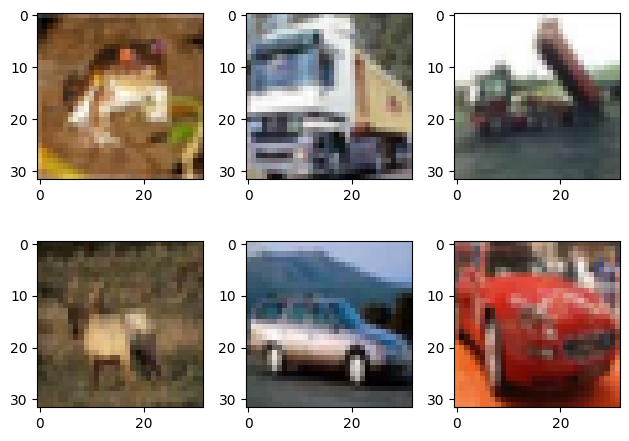

In [148]:
# View a few of the images
imgs = x_train[0:6]
fig, axes = plt.subplots(2, 3)
a = 0
b = 0
for i in range(0,6):
    axes[a,b].imshow(imgs[i],cmap=plt.cm.binary)
    a,b = auto_increment(a,b,3)
plt.tight_layout()
plt.show()

In [149]:
# Prepare the train and test images for a CNN
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [150]:
# Prepare the train and test labels for a CNN
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [151]:
# Split the data into a train and validation block
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

In [152]:
# Create a plot funtion like we did in the walk-though
def plot_history(history):
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(history_dict['accuracy']) + 1)

  plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
  plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
  plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  return plt.show()

### Review literature for CNN architectures and build at least 3 different architectures with varying depths, kernels, and normalization functions.  Be sure to split your data into a validation block and monitor loss and accuracy with graphs.  Build, compile, monitor, validate, and test each CNN architecture in one cell.  Try to get one of your CNN architectures to have a test accauracy above 80%.  Plot your models to verify your arcitecture is correct.
      
#### Here are is a link that reviews different CNN architectures.
#### https://medium.com/datadriveninvestor/five-powerful-cnn-architectures-b939c9ddd57b 

## CNN_Base_5 accuracy: 0.45

## CNN_Base_4 accuracy: 0.7797 (Best One)

In [ ]:
from keras.optimizers import Adam
def CNN_Base_4():
  backend.clear_session()
  model2 = models.Sequential()
  model2.add(layers.Rescaling(scale=1./255, input_shape = (32, 32, 3)))
  model2.add(layers.Conv2D(32, (3,3),activation = 'relu'))
  model2.add(layers.MaxPool2D((2,2)))
  model2.add(layers.Dropout(0.2))
  model2.add(layers.Conv2D(64, (3,3), activation = 'relu'))
  model2.add(layers.MaxPool2D((2,2)))
  model2.add(layers.Dropout(0.2))
  #model2.add(layers.BatchNormalization())
  #model2.add(layers.Conv2D(64, (3,3), activation = 'relu'))
  model2.add(layers.Conv2D(128, (3,3), activation = 'relu'))
  model2.add(layers.MaxPool2D((2,2)))
  model2.add(layers.BatchNormalization())
  model2.add(layers.Flatten())
  model2.add(layers.Dense(128, activation='relu'))
  model2.add(layers.Dropout(0.5))
  model2.add(layers.Dense(64, activation='relu'))   
  model2.add(layers.Dropout(0.5))
  model2.add(layers.Dense(32, activation='relu'))
  model2.add(layers.Dense(10, activation='softmax'))

  model2.compile(optimizer = Adam(learning_rate = 0.003),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
  return model2

Epoch 1/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.1097 - loss: 2.2872 - val_accuracy: 0.1426 - val_loss: 2.1974
Epoch 2/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.2108 - loss: 2.0394 - val_accuracy: 0.2865 - val_loss: 1.9210
Epoch 3/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.2542 - loss: 1.9373 - val_accuracy: 0.3114 - val_loss: 1.8369
Epoch 4/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3018 - loss: 1.8514 - val_accuracy: 0.3324 - val_loss: 1.8121
Epoch 5/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3297 - loss: 1.7842 - val_accuracy: 0.3832 - val_loss: 1.6744
Epoch 6/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3430 - loss: 1.7560 - val_accuracy: 0.3866 - val_loss: 1.6753
Epoch 7/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3649 - loss: 1.7149 - val_accuracy: 0.4144 - val_loss: 1.6400
Epoch 8/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3742 - loss: 1.7044 -

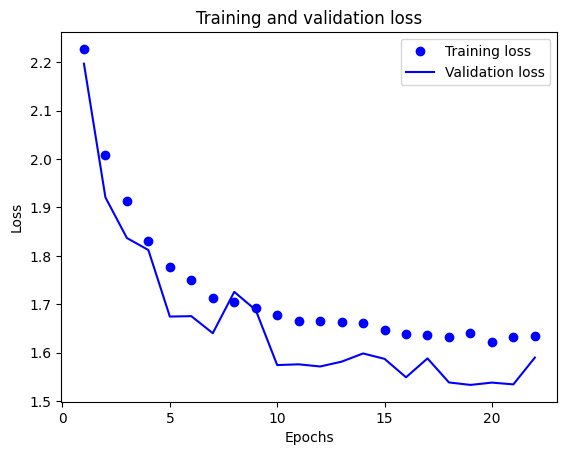

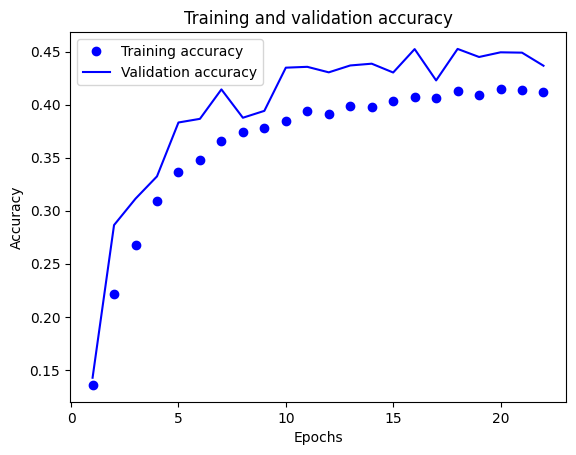

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4522 - loss: 1.5403
test_acc: 0.45100000500679016


In [120]:
model4 = CNN_Base_4()
history = model4.fit(X_train, 
          y_train, 
          epochs = 50, 
          batch_size = 32,  
          validation_data=(X_val, y_val),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights = True)])
plot_history(history)
test_loss, test_acc = model4.evaluate(x_test, y_test)
print('test_acc:', test_acc)

In [71]:
def CNN_Base_4():
  backend.clear_session()
  model2 = models.Sequential()
  #model.add(layers.Rescaling(scale=1./255, input_shape = (32, 32, 3)))
  model2.add(layers.Conv2D(32, (3,3),activation = 'relu'))
  model2.add(layers.Conv2D(64, (3,3), activation = 'relu'))
  model2.add(layers.MaxPool2D((2,2)))
  model2.add(layers.BatchNormalization())
  model2.add(layers.Conv2D(128, (3,3), activation = 'relu'))
  model2.add(layers.MaxPool2D((2,2)))
  model2.add(layers.BatchNormalization())
  model2.add(layers.Conv2D(64, (3,3), activation = 'relu'))
  model2.add(layers.Flatten())
  model2.add(layers.Dropout(0.5))
  model2.add(layers.Dense(32, activation='relu'))
  model2.add(layers.Dense(10, activation='softmax'))

  model2.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
  return model2

Epoch 1/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.3170 - loss: 1.8890 - val_accuracy: 0.5259 - val_loss: 1.3139
Epoch 2/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step - accuracy: 0.5585 - loss: 1.2434 - val_accuracy: 0.6257 - val_loss: 1.0436
Epoch 3/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step - accuracy: 0.6371 - loss: 1.0307 - val_accuracy: 0.6861 - val_loss: 0.8954
Epoch 4/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step - accuracy: 0.6862 - loss: 0.9005 - val_accuracy: 0.6552 - val_loss: 0.9935
Epoch 5/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.7135 - loss: 0.8362 - val_accuracy: 0.6516 - val_loss: 1.1685
Epoch 6/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.7322 - loss: 0.7776 - val_accuracy: 0.7162 - val_loss: 0.8312
Epoch 7/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.7446 - loss: 0.7439 - val_accuracy: 0.7468 - val_loss: 0.7552
Epoch 8/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.7658 -

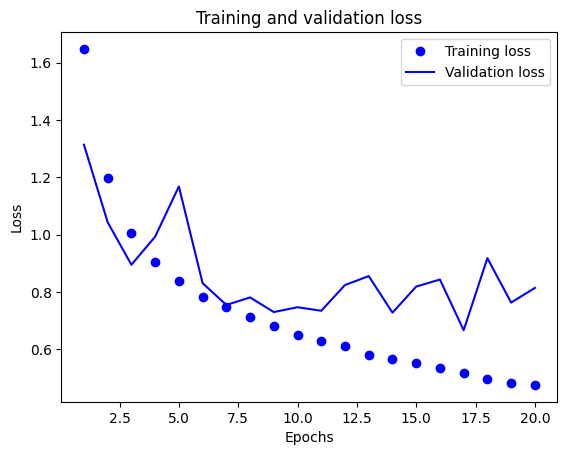

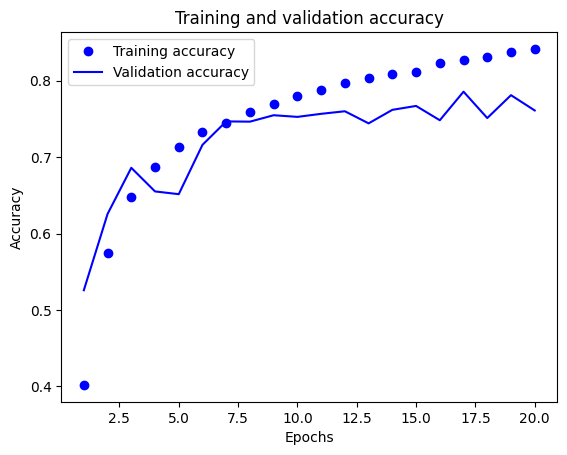

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7847 - loss: 0.6817
test_acc: 0.7797999978065491


In [72]:
model4 = CNN_Base_4()
history = model4.fit(X_train, 
          y_train, 
          epochs = 50, 
          batch_size = 32,  
          validation_data=(X_val, y_val),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])
plot_history(history)
test_loss, test_acc = model4.evaluate(x_test, y_test)
print('test_acc:', test_acc)

## CNN_Base_3 accuracy: 0.78

In [51]:
def CNN_Base_3():
  backend.clear_session()
  model2 = models.Sequential()
  #model.add(layers.Rescaling(scale=1./255, input_shape = (32, 32, 3)))
  model2.add(layers.Conv2D(32, (3,3),activation = 'relu'))
  model2.add(layers.Conv2D(64, (3,3), activation = 'relu'))
  model2.add(layers.MaxPool2D((2,2)))
  model2.add(layers.BatchNormalization())
  model2.add(layers.Conv2D(64, (3,3), activation = 'relu'))
  #model2.add(layers.Conv2D(128, (3,3), activation = 'relu'))
  model2.add(layers.MaxPool2D((2,2)))
  model2.add(layers.BatchNormalization())
  model2.add(layers.Conv2D(64, (3,3), activation = 'relu'))
  model2.add(layers.Flatten())
  model2.add(layers.Dropout(0.5))
  model2.add(layers.Dense(64, activation='relu'))
  model2.add(layers.Dense(10, activation='softmax'))

  model2.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
  return model2

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.3424 - loss: 1.8146 - val_accuracy: 0.5003 - val_loss: 1.3648
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.5746 - loss: 1.2114 - val_accuracy: 0.6528 - val_loss: 0.9906
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.6418 - loss: 1.0157 - val_accuracy: 0.6684 - val_loss: 0.9570
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.6841 - loss: 0.9137 - val_accuracy: 0.6332 - val_loss: 1.1175
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.7087 - loss: 0.8477 - val_accuracy: 0.6966 - val_loss: 0.8829
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.7246 - loss: 0.7947 - val_accuracy: 0.6879 - val_loss: 0.9332
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.7355 - loss: 0.7733 - val_accuracy: 0.7185 - val_loss: 0.8388
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.7447 -

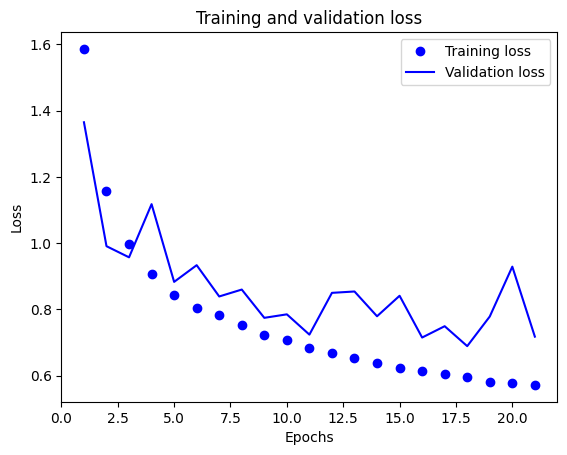

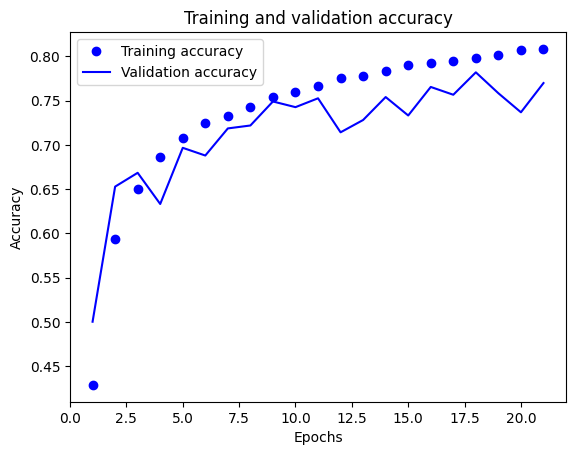

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7829 - loss: 0.6845
test_acc: 0.7806000113487244


In [52]:
model3 = CNN_Base_3()
history = model3.fit(X_train, 
          y_train, 
          epochs = 50, 
          batch_size = 32,  
          validation_data=(X_val, y_val),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])
plot_history(history)
test_loss, test_acc = model3.evaluate(x_test, y_test)
print('test_acc:', test_acc)

## CCN_base_2 accuracy: 0.7660

In [48]:
def CNN_Base_2():
  backend.clear_session()
  model2 = models.Sequential()
  #model.add(layers.Rescaling(scale=1./255, input_shape = (32, 32, 3)))
  model2.add(layers.Conv2D(32, (3,3),activation = 'relu'))
  model2.add(layers.Conv2D(64, (3,3), activation = 'relu'))
  model2.add(layers.MaxPool2D((2,2)))
  model2.add(layers.BatchNormalization())
  model2.add(layers.Conv2D(64, (3,3), activation = 'relu'))
  model2.add(layers.Conv2D(128, (3,3), activation = 'relu'))
  model2.add(layers.MaxPool2D((2,2)))
  model2.add(layers.BatchNormalization())
  model2.add(layers.Conv2D(64, (3,3), activation = 'relu'))
  model2.add(layers.Flatten())
  model2.add(layers.Dropout(0.5))
  model2.add(layers.Dense(64, activation='relu'))
  model2.add(layers.Dense(10, activation='softmax'))

  model2.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
  return model2

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.3201 - loss: 1.8935 - val_accuracy: 0.5265 - val_loss: 1.3261
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.5612 - loss: 1.2471 - val_accuracy: 0.5981 - val_loss: 1.1410
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.6346 - loss: 1.0571 - val_accuracy: 0.5388 - val_loss: 1.3780
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.6699 - loss: 0.9614 - val_accuracy: 0.7015 - val_loss: 0.8850
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.6942 - loss: 0.8905 - val_accuracy: 0.6853 - val_loss: 1.0572
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.7129 - loss: 0.8506 - val_accuracy: 0.6642 - val_loss: 1.2065
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.7272 - loss: 0.8259 - val_accuracy: 0.7220 - val_loss: 0.8903
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.7406 -

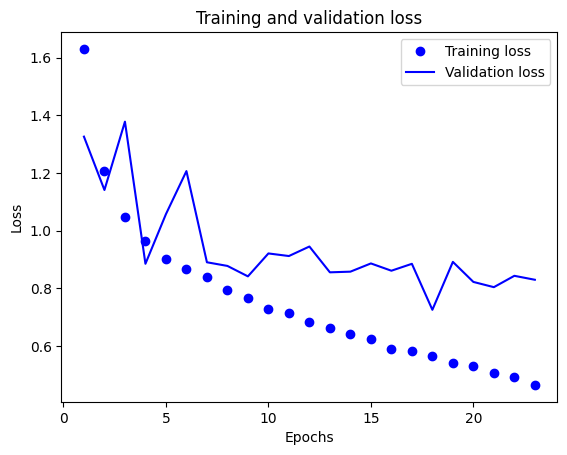

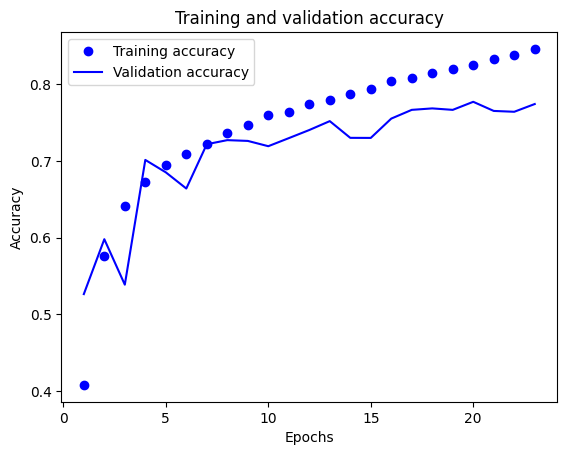

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7723 - loss: 0.8466
test_acc: 0.765999972820282


In [50]:
model2 = CNN_Base_2()
history = model2.fit(X_train, 
          y_train, 
          epochs = 50, 
          batch_size = 32,  
          validation_data=(X_val, y_val),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])
plot_history(history)
test_loss, test_acc = model2.evaluate(x_test, y_test)
print('test_acc:', test_acc)

## CNN_Base accuracy_1: 0.7418 

In [36]:
def CNN_Base():
  backend.clear_session()
  model1 = models.Sequential()
  #model.add(layers.Rescaling(scale=1./255, input_shape = (32, 32, 3)))
  model1.add(layers.Conv2D(32, (3,3), activation = 'relu'))
  model1.add(layers.MaxPool2D((2,2)))
  model1.add(layers.BatchNormalization())
  model1.add(layers.Conv2D(64, (3,3), activation = 'relu'))
  model1.add(layers.MaxPool2D((2,2)))
  model1.add(layers.BatchNormalization())
  model1.add(layers.Conv2D(128, (3,3), activation = 'relu'))
  model1.add(layers.Flatten())
  model1.add(layers.Dropout(0.5))
  model1.add(layers.Dense(64, activation='relu'))
  model1.add(layers.Dense(10, activation='softmax'))

  model1.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
  return model1


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3791 - loss: 1.7061 - val_accuracy: 0.4368 - val_loss: 1.9803
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5912 - loss: 1.1499 - val_accuracy: 0.5429 - val_loss: 1.4269
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6526 - loss: 0.9770 - val_accuracy: 0.5896 - val_loss: 1.2282
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6956 - loss: 0.8687 - val_accuracy: 0.6805 - val_loss: 0.9083
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7186 - loss: 0.7976 - val_accuracy: 0.6804 - val_loss: 0.9279
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7403 - loss: 0.7438 - val_accuracy: 0.6638 - val_loss: 1.0211
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7515 - loss: 0.7020 - val_accuracy: 0.7176 - val_loss: 0.8331
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7707 - loss: 0.6504 - val_acc

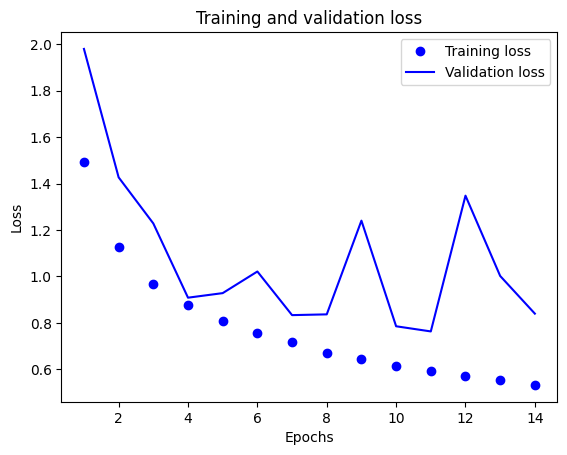

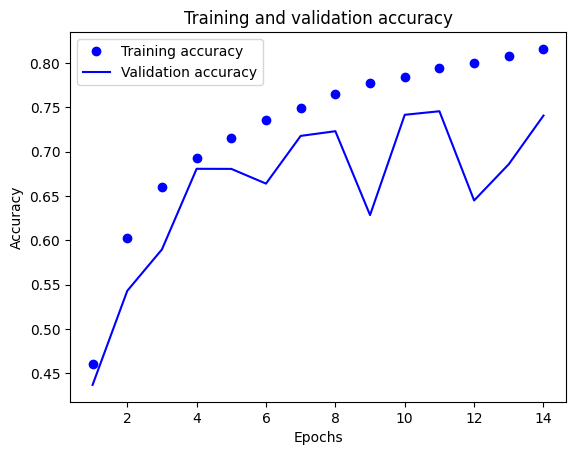

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7432 - loss: 0.7579
test_acc: 0.7418000102043152


In [38]:
model1 = CNN_Base()
history = model1.fit(X_train, 
          y_train, 
          epochs = 50, 
          batch_size = 64,  
          validation_data=(X_val, y_val),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])
plot_history(history)
test_loss, test_acc = model1.evaluate(x_test, y_test)
print('test_acc:', test_acc)

## lenet accuracy: 0.522

In [24]:
from keras.models import Model
def lenet_5(in_shape=(32,32,3), n_classes=10, opt='adam'):
    backend.clear_session()
    model = models.Sequential()
    in_layer = layers.Input(in_shape)
    conv1 = layers.Conv2D(filters=20, kernel_size=3,
                          padding='same', activation='relu')(in_layer)
    pool1 = layers.MaxPool2D()(conv1)
    conv2 = layers.Conv2D(filters=50, kernel_size=3,
                          padding='same', activation='relu')(pool1)
    pool2 = layers.MaxPool2D()(conv2)
    flatten = layers.Flatten()(pool2)
    dense1 = layers.Dense(200, activation='relu')(flatten)
    preds = layers.Dense(n_classes, activation='softmax')(dense1)

    model = Model(in_layer, preds)
    model.compile(loss="categorical_crossentropy", optimizer=opt,
	              metrics=["accuracy"])
    return model
if __name__ == '__main__':
    model = alexnet()
    print(model.summary())


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 96)       │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 64)       │        55,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297,066 (1.13 MB)

 Trainable params: 297,066 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.1020 - loss: 3.0972 - val_accuracy: 0.1147 - val_loss: 2.2996
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.1273 - loss: 2.2936 - val_accuracy: 0.1806 - val_loss: 2.1919
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.1899 - loss: 2.1883 - val_accuracy: 0.2662 - val_loss: 1.9907
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.2358 - loss: 2.0300 - val_accuracy: 0.2994 - val_loss: 1.8827
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.2663 - loss: 1.9476 - val_accuracy: 0.3173 - val_loss: 1.8455
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.2956 - loss: 1.8763 - val_accuracy: 0.3375 - val_loss: 1.7597
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.3203 - loss: 1.8179 - val_accuracy: 0.3425 - val_loss: 1.7739
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.3478 -

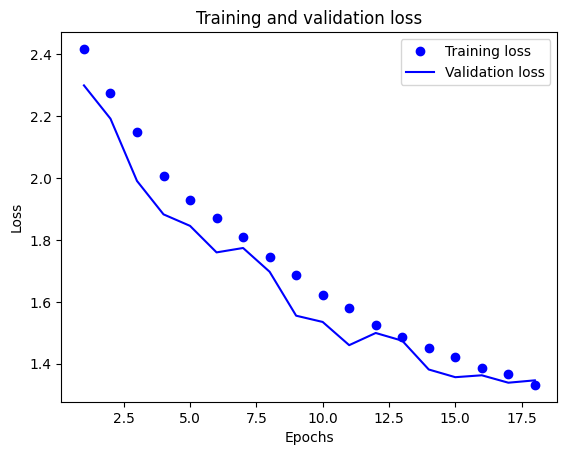

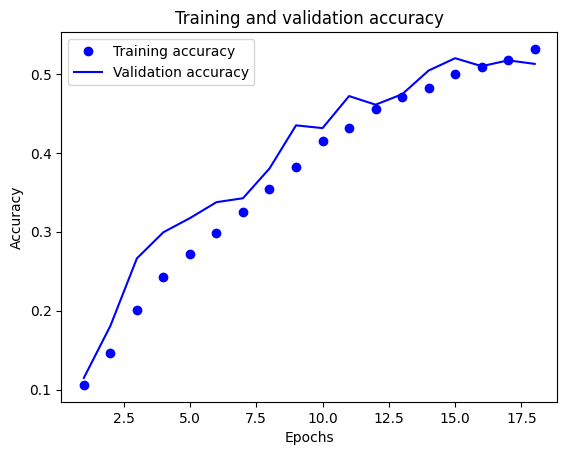

In [25]:
history = model.fit(X_train, 
          y_train, 
          epochs = 50, 
          batch_size = 32,  
          validation_data=(X_val, y_val),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])
plot_history(history)

In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5209 - loss: 1.3753
test_acc: 0.5220000147819519


## resnet50 test trial accuracy: low

In [20]:
from keras.models import Model

def _after_conv(in_tensor):
    norm = layers.BatchNormalization()(in_tensor)
    return layers.Activation('relu')(norm)

def conv1(in_tensor, filters):
    conv = layers.Conv2D(filters, kernel_size=1, strides=1)(in_tensor)
    return _after_conv(conv)

def conv1_downsample(in_tensor, filters):
    conv = layers.Conv2D(filters, kernel_size=1, strides=2)(in_tensor)
    return _after_conv(conv)

def conv3(in_tensor, filters):
    conv = layers.Conv2D(filters, kernel_size=3, strides=1, padding='same')(in_tensor)
    return _after_conv(conv)

def conv3_downsample(in_tensor, filters):
    conv = layers.Conv2D(filters, kernel_size=3, strides=2, padding='same')(in_tensor)
    return _after_conv(conv)

def resnet_block_wo_bottlneck(in_tensor, filters, downsample=False):
    if downsample:
        conv1_rb = conv3_downsample(in_tensor, filters)
    else:
        conv1_rb = conv3(in_tensor, filters)
    conv2_rb = conv3(conv1_rb, filters)

    if downsample:
        in_tensor = conv1_downsample(in_tensor, filters)
    result = layers.Add()([conv2_rb, in_tensor])

    return layers.Activation('relu')(result)

def resnet_block_w_bottlneck(in_tensor,
                             filters,
                             downsample=False,
                             change_channels=False):
    if downsample:
        conv1_rb = conv1_downsample(in_tensor, int(filters/4))
    else:
        conv1_rb = conv1(in_tensor, int(filters/4))
    conv2_rb = conv3(conv1_rb, int(filters/4))
    conv3_rb = conv1(conv2_rb, filters)

    if downsample:
        in_tensor = conv1_downsample(in_tensor, filters)
    elif change_channels:
        in_tensor = conv1(in_tensor, filters)
    result = layers.Add()([conv3_rb, in_tensor])

    return result

def _pre_res_blocks(in_tensor):
    conv = layers.Conv2D(64, 7, strides=2, padding='same')(in_tensor)
    conv = _after_conv(conv)
    pool = layers.MaxPool2D(3, 2, padding='same')(conv)
    return pool

def _post_res_blocks(in_tensor, n_classes):
    pool = layers.GlobalAvgPool2D()(in_tensor)
    preds = layers.Dense(n_classes, activation='softmax')(pool)
    return preds

def convx_wo_bottleneck(in_tensor, filters, n_times, downsample_1=False):
    res = in_tensor
    for i in range(n_times):
        if i == 0:
            res = resnet_block_wo_bottlneck(res, filters, downsample_1)
        else:
            res = resnet_block_wo_bottlneck(res, filters)
    return res

def convx_w_bottleneck(in_tensor, filters, n_times, downsample_1=False):
    res = in_tensor
    for i in range(n_times):
        if i == 0:
            res = resnet_block_w_bottlneck(res, filters, downsample_1, not downsample_1)
        else:
            res = resnet_block_w_bottlneck(res, filters)
    return res

def _resnet(in_shape=(32,32,3),
            n_classes=10,
            opt='sgd',
            convx=[64, 128, 256, 512],
            n_convx=[2, 2, 2, 2],
            convx_fn=convx_wo_bottleneck):
    in_layer = layers.Input(in_shape)

    downsampled = _pre_res_blocks(in_layer)

    conv2x = convx_fn(downsampled, convx[0], n_convx[0])
    conv3x = convx_fn(conv2x, convx[1], n_convx[1], True)
    conv4x = convx_fn(conv3x, convx[2], n_convx[2], True)
    conv5x = convx_fn(conv4x, convx[3], n_convx[3], True)

    preds = _post_res_blocks(conv5x, n_classes)

    model = Model(in_layer, preds)
    model.compile(loss="categorical_crossentropy", optimizer=opt,
	              metrics=["accuracy"])
    return model

def resnet18(in_shape=(32,32,3), n_classes=10, opt='sgd'):
    return _resnet(in_shape, n_classes, opt)

def resnet34(in_shape=(32,32,3), n_classes=10, opt='sgd'):
    return _resnet(in_shape,
                  n_classes,
                  opt,
                  n_convx=[3, 4, 6, 3])

def resnet50(in_shape=(32,32,3), n_classes=10, opt='sgd'):
    return _resnet(in_shape,
                  n_classes,
                  opt,
                  [256, 512, 1024, 2048],
                  [3, 4, 6, 3],
                  convx_w_bottleneck)

def resnet101(in_shape=(32,32,3), n_classes=10, opt='sgd'):
    return _resnet(in_shape,
                  n_classes,
                  opt,
                  [256, 512, 1024, 2048],
                  [3, 4, 23, 3],
                  convx_w_bottleneck)

def resnet152(in_shape=(32,32,3), n_classes=10, opt='sgd'):
    return _resnet(in_shape,
                  n_classes,
                  opt,
                  [256, 512, 1024, 2048],
                  [3, 8, 36, 3],
                  convx_w_bottleneck)

if __name__ == '__main__':
    model = resnet50()
    print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 16, 16,    │      9,472 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 16, 16,    │        256 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 8, 8, 64)  │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 8, 8, 64)  │      4,160 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 8, 8, 64)  │     36,928 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 8, 8, 256) │     16,640 │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 8, 8, 256) │     16,640 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 256) │      1,024 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 256) │      1,024 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 8, 8, 256) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 8, 8, 256) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 8, 8, 256) │          0 │ activation_3[0][… │
│                     │                   │            │ activation_4[0][

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 23,555,082 (89.86 MB)

 Non-trainable params: 53,120 (207.50 KB)

None


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 310s 245ms/step - accuracy: 0.2317 - loss: 5.0426 - val_accuracy: 0.3352 - val_loss: 18.6178
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 301s 241ms/step - accuracy: 0.3312 - loss: 3.8695 - val_accuracy: 0.2871 - val_loss: 279.3272
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 345s 276ms/step - accuracy: 0.3580 - loss: 3.5848 - val_accuracy: 0.4040 - val_loss: 1.7159
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 342s 274ms/step - accuracy: 0.3325 - loss: 3.4912 - val_accuracy: 0.3833 - val_loss: 1.6676
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 323s 258ms/step - accuracy: 0.3224 - loss: 3.2887 - val_accuracy: 0.3628 - val_loss: 14.1980
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 306s 245ms/step - accuracy: 0.3686 - loss: 3.0419 - val_accuracy: 0.4256 - val_loss: 1.6549
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 303s 242ms/step - accuracy: 0.4097 - loss: 2.8668 - val_accuracy: 0.2684 - val_loss: 2.7548
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 305s 244ms/step 

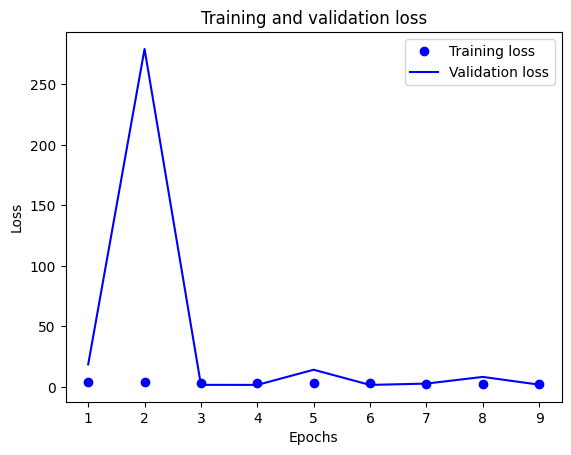

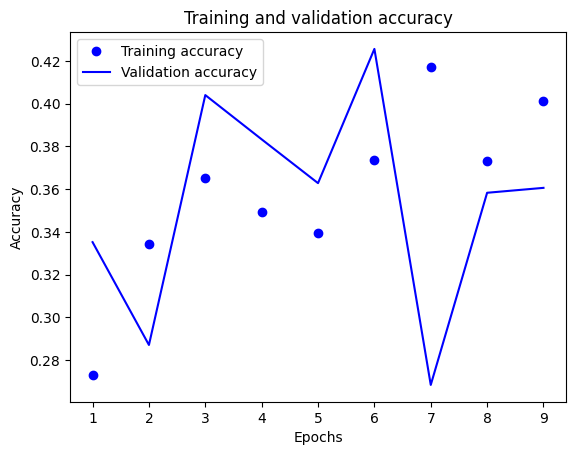

In [21]:
history = model.fit(X_train, 
          y_train, 
          epochs = 50, 
          batch_size = 32,  
          validation_data=(X_val, y_val),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])
plot_history(history)

## RESNET50 2nd try accuracy: 0.61

In [ ]:
#X_train,x_test,X_val_val = X_train/255.0,x_test/255.0, X_val/255.0

In [ ]:
from keras.applications import ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False
backend.clear_session()
model5 = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  
])
model5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



Epoch 1/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 48s 39ms/step - accuracy: 0.3690 - loss: 1.9486 - val_accuracy: 0.5547 - val_loss: 1.3006
Epoch 2/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 47s 41ms/step - accuracy: 0.4918 - loss: 1.4388 - val_accuracy: 0.5683 - val_loss: 1.2211
Epoch 3/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 48s 41ms/step - accuracy: 0.5277 - loss: 1.3407 - val_accuracy: 0.5900 - val_loss: 1.1762
Epoch 4/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 47s 40ms/step - accuracy: 0.5452 - loss: 1.2816 - val_accuracy: 0.5934 - val_loss: 1.1739
Epoch 5/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 46s 40ms/step - accuracy: 0.5606 - loss: 1.2449 - val_accuracy: 0.5874 - val_loss: 1.1727
Epoch 6/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 45s 39ms/step - accuracy: 0.5689 - loss: 1.2207 - val_accuracy: 0.6018 - val_loss: 1.1366
Epoch 7/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 46s 39ms/step - accuracy: 0.5789 - loss: 1.1825 - val_accuracy: 0.6023 - val_loss: 1.1335
Epoch 8/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 46s 39ms/step - accuracy: 0.5886 -

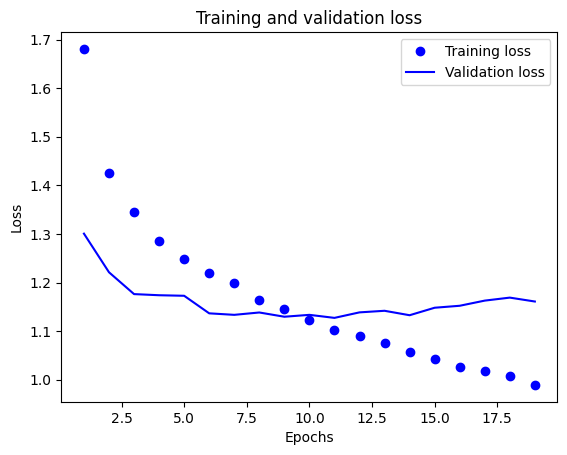

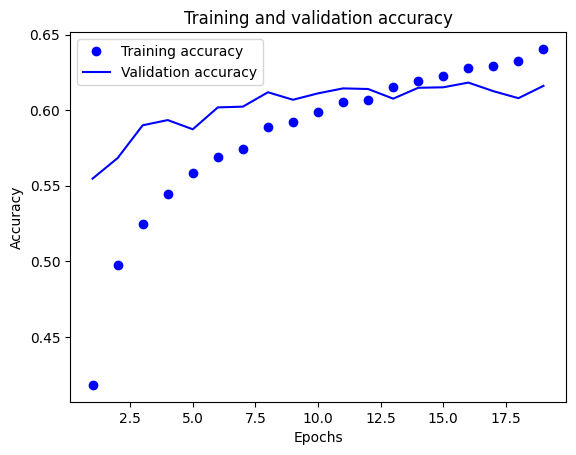

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.6097 - loss: 1.1660
test_acc: 0.6133000254631042


In [156]:
history = model5.fit(X_train, 
          y_train, 
          epochs = 50, 
          batch_size = 32,  
          validation_data=(X_val, y_val),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])
plot_history(history)
test_loss, test_acc = model5.evaluate(x_test, y_test)
print('test_acc:', test_acc)

## CDSM attention accuracy: 0.7647

In [ ]:
from keras import regularizers
backend.clear_session()
class CDSM(layers.Layer):
    def __init__(self, filters):
        super(CDSM, self).__init__()
        self.filters = filters

    def build(self, input_shape):
        self.conv1x1 = layers.Conv2D(self.filters, (1, 1), activation="relu")
        self.sigmoid = layers.Activation("sigmoid")

    def call(self, inputs):
        attention_map = self.conv1x1(inputs)
        attention_map = self.sigmoid(attention_map)
        return inputs * attention_map  

def create_cnn_with_cdsm():
    inputs = layers.Input(shape=(32, 32, 3))
    x = layers.Conv2D(64, (3, 3), activation="relu",kernel_regularizer=regularizers.l2(0.0001), padding="same")(inputs)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.BatchNormalization()(x)
    # Insert CDSM
    x = CDSM(64)(x)
    
    x = layers.Conv2D(128, (3, 3), activation="relu", kernel_regularizer=regularizers.l2(0.0001),padding="same")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.BatchNormalization()(x)
    
    x = layers.Conv2D(256, (3, 3), activation="relu",kernel_regularizer=regularizers.l2(0.0001), padding="same")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.BatchNormalization()(x)

    x = layers.Flatten()(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation="softmax")(x)

    model = models.Model(inputs, outputs)
    return model

# Compile and Train
model = create_cnn_with_cdsm()
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cdsm (CDSM)                     │ (None, 16, 16, 64)     │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,467,402 (5.60 MB)

 Trainable params: 1,466,506 (5.59 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - accuracy: 0.1545 - loss: 2.4817 - val_accuracy: 0.3022 - val_loss: 1.8965
Epoch 2/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - accuracy: 0.2730 - loss: 1.9081 - val_accuracy: 0.3052 - val_loss: 1.8568
Epoch 3/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - accuracy: 0.3447 - loss: 1.7337 - val_accuracy: 0.4295 - val_loss: 1.5471
Epoch 4/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 30s 52ms/step - accuracy: 0.4086 - loss: 1.5981 - val_accuracy: 0.4842 - val_loss: 1.4834
Epoch 5/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 30s 52ms/step - accuracy: 0.4738 - loss: 1.4636 - val_accuracy: 0.5265 - val_loss: 1.4070
Epoch 6/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - accuracy: 0.5295 - loss: 1.3521 - val_accuracy: 0.5758 - val_loss: 1.2751
Epoch 7/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - accuracy: 0.5856 - loss: 1.2322 - val_accuracy: 0.5208 - val_loss: 1.4822
Epoch 8/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 30s 52ms/step - accuracy: 0.6168 - loss: 1.1586 - 

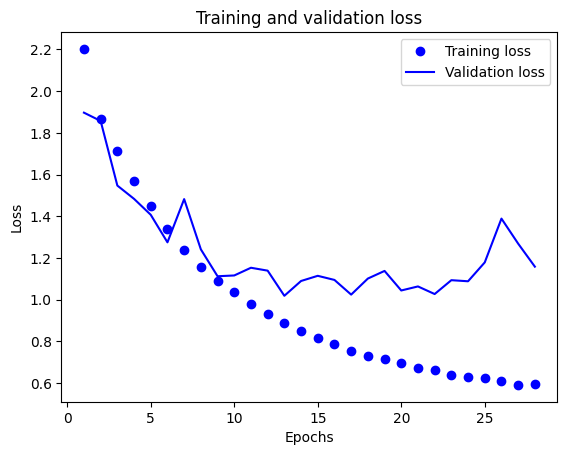

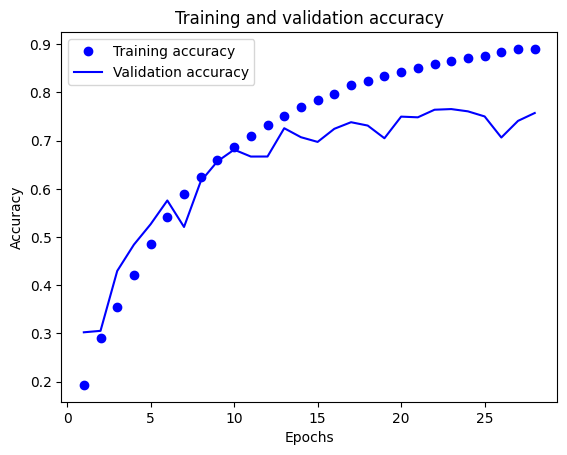

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7669 - loss: 1.1109
test_acc: 0.7646999955177307


In [184]:
history = model.fit(X_train, 
          y_train, 
          epochs = 50, 
          batch_size = 64,  
          validation_data=(X_val, y_val),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights = True)])
plot_history(history)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:', test_acc)

## Base CNN 6

In [200]:
## CNN_Base_4 accuracy: 0.7797
def CNN_Base_6():
  backend.clear_session()
  model2 = models.Sequential()
  model2.add(layers.Rescaling(scale=1./255, input_shape = (32, 32, 3)))
  model2.add(layers.Conv2D(32, (3,3),padding= 'same', activation = 'relu'))
  model2.add(layers.Conv2D(64, (3,3), activation = 'relu')) 
  model2.add(layers.MaxPool2D((2,2)))
  model2.add(layers.BatchNormalization())
  model2.add(layers.Conv2D(128, (3,3), padding= 'same', activation = 'relu'))
  model2.add(layers.MaxPool2D((2,2)))
  model2.add(layers.BatchNormalization())
  model2.add(layers.Conv2D(64, (3,3), padding= 'same',activation = 'relu'))
  model2.add(layers.Flatten())
  model2.add(layers.Dropout(0.5))
  model2.add(layers.Dense(32, activation='relu'))
  model2.add(layers.Dense(10, activation='softmax'))

  model2.compile(optimizer = Adam(learning_rate=0.0001),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
  return model2



Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


586/586 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - accuracy: 0.2508 - loss: 2.0893 - val_accuracy: 0.3991 - val_loss: 1.6377
Epoch 2/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 31s 54ms/step - accuracy: 0.4713 - loss: 1.4702 - val_accuracy: 0.5543 - val_loss: 1.2532
Epoch 3/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.5481 - loss: 1.2642 - val_accuracy: 0.5974 - val_loss: 1.1307
Epoch 4/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.5930 - loss: 1.1368 - val_accuracy: 0.6061 - val_loss: 1.1061
Epoch 5/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - accuracy: 0.6346 - loss: 1.0344 - val_accuracy: 0.6439 - val_loss: 0.9988
Epoch 6/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.6599 - loss: 0.9628 - val_accuracy: 0.6328 - val_loss: 1.0671
Epoch 7/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.6807 - loss: 0.9031 - val_accuracy: 0.6528 - val_loss: 0.9935
Epoch 8/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.6933 - loss: 0.8600 - val_accurac

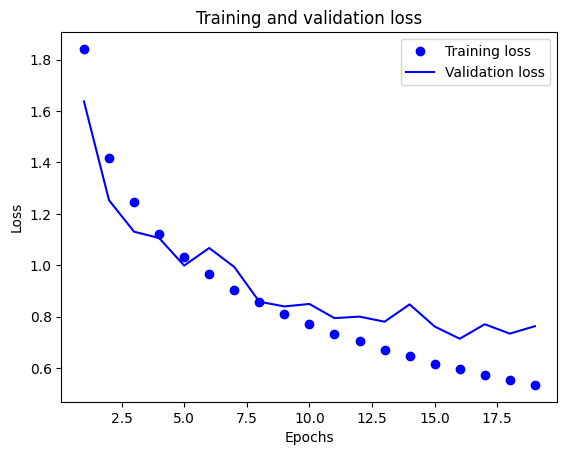

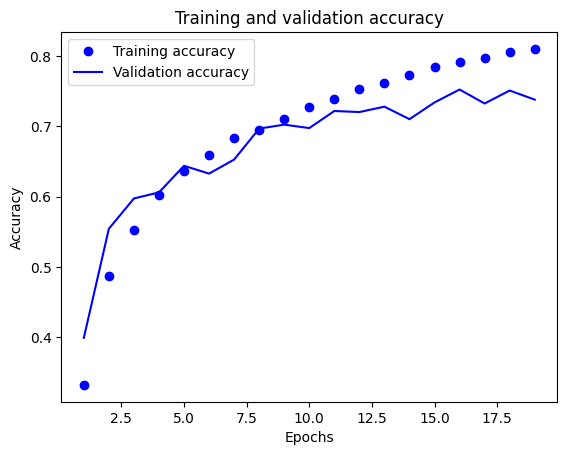

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7536 - loss: 0.7248
test_acc: 0.7491999864578247


In [201]:
model6 = CNN_Base_6()
history = model6.fit(X_train, 
          y_train, 
          epochs = 50, 
          batch_size = 64,  
          validation_data=(X_val, y_val),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])
plot_history(history)
test_loss, test_acc = model6.evaluate(x_test, y_test)
print('test_acc:', test_acc)

## Summary:

I spent about 20 hours just trying what different changes will do to a model, could not get to 0.8 at the end of the day. However, I did learn from the assignment. Bullet points below are some of the things I have learned along the process:
* Adam and SGD are the best optimizers for CNN (at least in this practice). Adam does slightly better job than SGD, rmsprop work too but super slow.
* More filters per layer does not always bring better score, but it will definitely increase the time it takes to train, especially when you are using Mac. 
* I tried RESNET by just coping the code from website, it is bad. Then I tried to understand how to better apply it (only tried once because it takes forever to run), the result was still not good. Resnet is a big thing so I will learn more about it and try again.
* I added one attention module CDSM. I added this one because this it the one of many I saw stored in YOLO. I just want to see how it affects the model. Did not find much difference except the model starts overfitting. training accuracy progress much faster than validation accuracy.
* Tested L2 regularization in them but never seem to improve the model. 
* Batch normalization does improve accuracy but increases training time. 
* dropout rate after flatten at 0.5 gives best result. 0.3/0.4 not so much,0.6 is a little too much.
* learning rate is best as default. I tried 0.003, 0.002, reduce accuracy. 0.0001, 0.000001 is making the model running slower.

